# Работа с пропусками. Выбросы

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Пропущенные значения**

### Поиск

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [10]:
df['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

### Просмотр пропусков

In [11]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Если нужно все кроме пропусков, то тогда так:

In [12]:
df[df['Age'].isna()==False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Работа с пропусками

-  Если в колонке пропусков больше, чем 40%:
 -   **колонку удаляем**

-  Если в колонке пропущено меньше, чем 40% данных:
 - **удаляем** все **строчки**, в которых есть пропуски (когда данных много)
 - **заменяем** все **строчки**, в которых есть пропуски (когда данных не очень много)

In [13]:
df['Age'].value_counts(dropna=False, normalize = True)

NaN      0.198653
24.00    0.033670
22.00    0.030303
18.00    0.029181
28.00    0.028058
           ...   
36.50    0.001122
55.50    0.001122
0.92     0.001122
23.50    0.001122
74.00    0.001122
Name: Age, Length: 89, dtype: float64

In [14]:
df['Cabin'].value_counts(dropna=False, normalize = True)

NaN            0.771044
C23 C25 C27    0.004489
G6             0.004489
B96 B98        0.004489
C22 C26        0.003367
                 ...   
E34            0.001122
C7             0.001122
C54            0.001122
E36            0.001122
C148           0.001122
Name: Cabin, Length: 148, dtype: float64

#### Пропусков больше, чем 40%

Удаление колонки:



``` python
датафрейм.drop('название колонки', axis=1) #просто покажет датасет без этой колонки (можно сохранить в новую переменную)
```

``` python
датафрейм.drop('название колонки', axis=1, inplace=True) #правда удалит колонку из изначального датафрейма
```

In [15]:
df.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [16]:
df.drop(2, axis = 0) # если хотите удалить строку, то axis = 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Удаление колонок:



``` python
датафрейм.drop(['название колонки 1', 'название колонки 2'], axis=1) #просто покажет датасет без этой колонки (можно сохранить в новую переменную)
```

``` python
датафрейм.drop(['название колонки 1', 'название колонки 2'], axis=1, inplace=True) #действительно удалит
```

In [17]:
df.drop(['Age', 'Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Пропущено меньше 40% данных

##### **Удаление**

Удаляем все строчки хотя бы с одним пропуском



``` python
датафрейм.dropna(subset = ['название колонки']) #просто покажет датасет без nan (можно сохранить в новую переменную)
```

``` python
датафрейм.dropna(subset = ['название колонки'], inplace=True) #правда удалит nan из изначального датафрейма
```

In [19]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Удаляем все строчки, в которых есть пропуски в определенной колонке

In [20]:
df.dropna(subset = ['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Замена**

Можно заменить пропуск данных на:
- меру центральной тенденции по всему столбцу
- меру центральной тенденции внутри группы
- на случайный элемент

###### На меру центральной тенденции

**Количественные данные**:
- **Непрерывные**
 - Нормальное распределение:
   - заменяем на медиану/среднее
 - НЕнормальное распределение:
   - заменяем на медиану
- **Дискретные**
 - заменяем на моду/среднее

**Категориальные данные**:
 -  заменяем на моду

1. Определяем какая мера центральной тенденции лучше оценит типичное наблюдение из нашего распределения данных

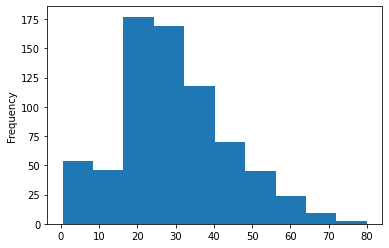

In [21]:
df['Age'].plot(kind = "hist");

2. Ищем эту меру центральной тенденции

In [22]:
df['Age'].median()

28.0

3. Заменяем на меру центральной тенденции

In [23]:
df['Age_fillna'] = df['Age'].fillna(df['Age'].median()) #заменяем все пропуски в столбце возраст на Медиану

4. Проверяем, что все пропуски заменились

In [24]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillna
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,28.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,28.0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,28.0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,28.0


In [25]:
df[df['Age'].isna()==False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,39.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


Пример с категориальной:

In [26]:
df['Embarked'].mode()[0]

'S'

In [27]:
df['Embarked_fillna'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) #заменяем все пропуски в столбце порт на моду
df[df['Embarked'].isna()] #проверяем, что замена случилась

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillna,Embarked_fillna
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,S


## **Выбросы**

**Выброс** — это аномальное значение в данных, которое значительно отличается от значения, выраженного мерой центральной тенденции и в целом от распределения данных в выборке



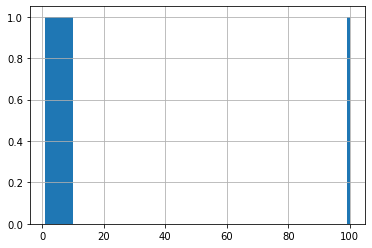

In [28]:
pd.Series([1,2,3,4,5,6,7,8,9,100]).hist(bins=100);

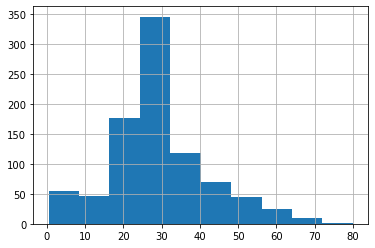

In [29]:
df['Age_fillna'].hist();

Два способа найти выбросы:
- IQR*1.5
- std/2 *std/3 *std

### 1.5*IQR

0. Построим ящик с усами и посмотрим на выбросы визуально

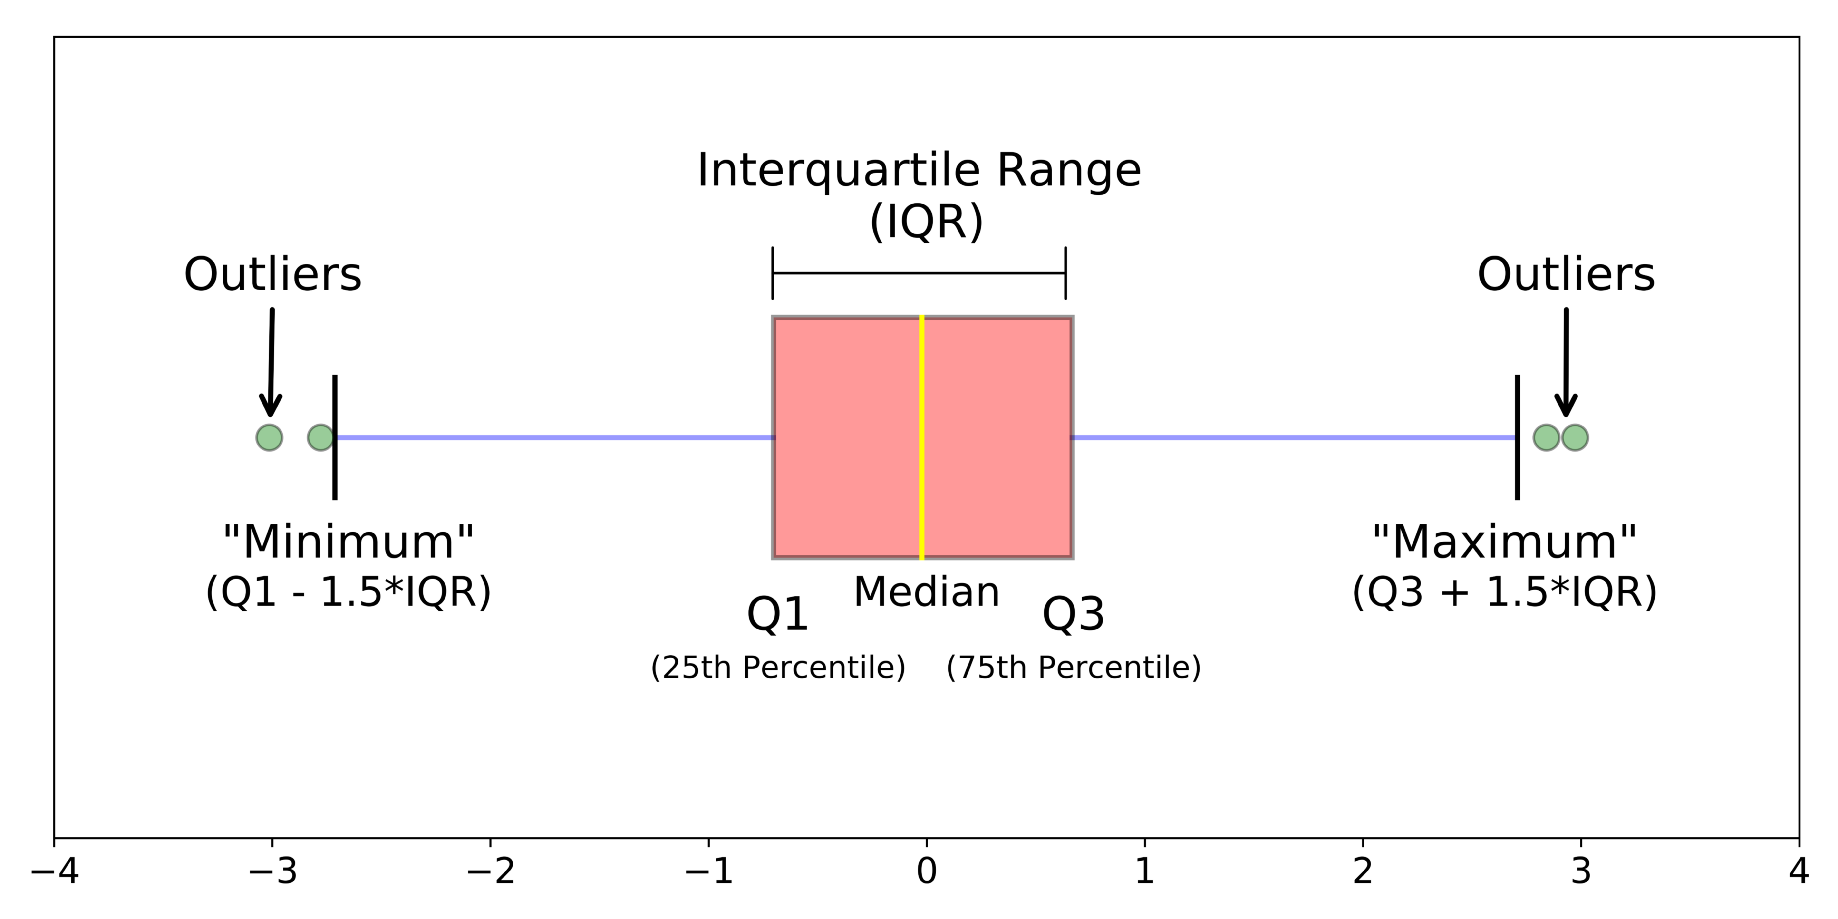

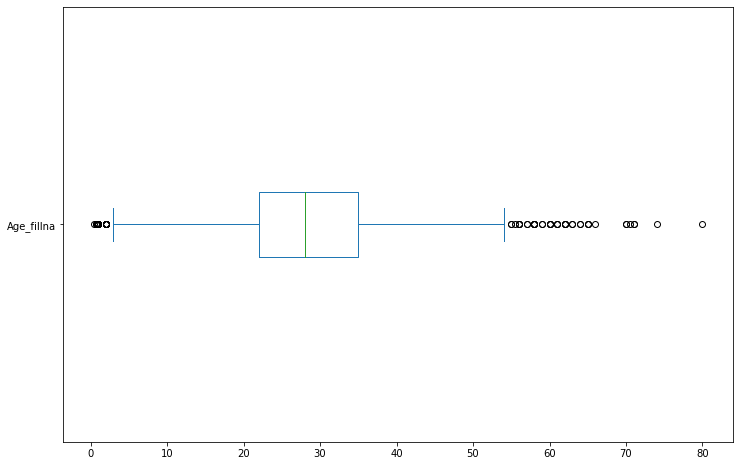

In [30]:
df['Age_fillna'].plot(kind = "box", vert=False, figsize=(12,8));

1. Находим межрквартильное расстояние

In [31]:
q1=df['Age_fillna'].quantile(0.25)
q1

22.0

In [32]:
q3=df['Age_fillna'].quantile(0.75)
q3

35.0

In [33]:
iqr = q3-q1
iqr

13.0

2. Находим границы интервала, все значения за пределами которого буду считаться выбросами

In [34]:
low1 = q1 - iqr*1.5 #нижняя границы
low1

2.5

In [35]:
up1 = q3 + iqr*1.5 #верхняя граница
up1

54.5

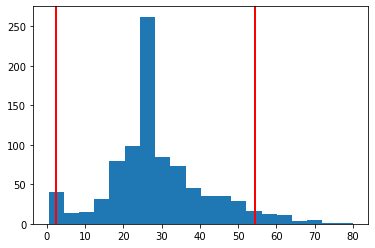

In [43]:
plt.hist(df['Age_fillna'], bins=20)
plt.axvline(low1, color='r', linewidth=2)
plt.axvline(up1, color='r', linewidth=2);

3. Сделаем фильтрацию и посчитаем те значения, которые являются выбросами

In [41]:
df[(df['Age_fillna']<low1) | (df['Age_fillna']>up1)].shape[0]

66

4. А теперь посмотрим на распределение данных без учета выбросов

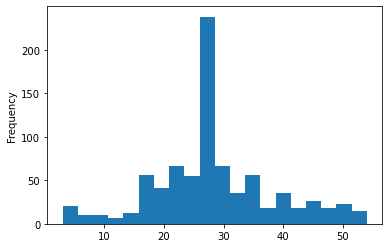

In [49]:
df[(df['Age_fillna']>=low1) & (df['Age_fillna']<=up1)]['Age_fillna'].plot(kind = "hist", bins=20);

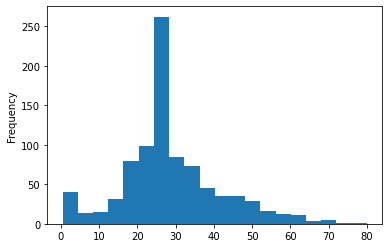

In [46]:
df['Age_fillna'].plot(kind = "hist", bins=20);

### std/2*std/3 *std

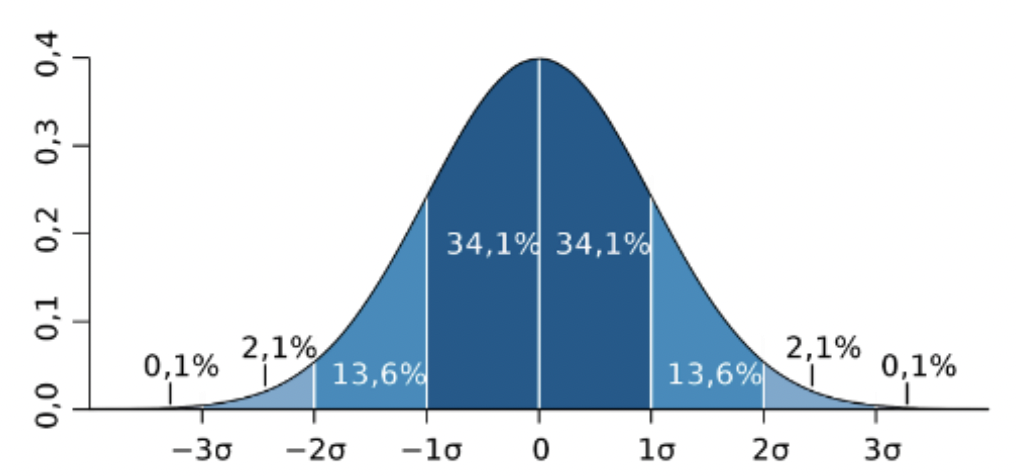

Если распределение данных нормальное:

- если брать **1 стандартное отклонение** от среднего, то НЕ выбросами будут считаться **68,2%** центральных данных

- если брать **2 стандартных отклонения** от среднего, то НЕ выбросами будут считаться **95,5%** центральных данных

- если брать **3 стандартных отклонения** от среднего, то НЕ выбросами будут считаться **99,7%** центральных данных (а выбросами соответственно 0,2-0,3%)

1. Находим среднее

In [45]:
avg = df['Age_fillna'].mean()
avg

29.36158249158249

2. Находим стандартное отклонение

In [46]:
std = df['Age_fillna'].std()
std

13.019696550973194

3. Находим границы интервала, все значения за пределами которого буду считаться выбросами

In [47]:
low2 = avg - 3 * std #можно посчитать отклонение и на одно, и на два, и на три
low2

-9.697507161337093

In [48]:
up2 = avg + 3 * std
up2

68.42067214450208

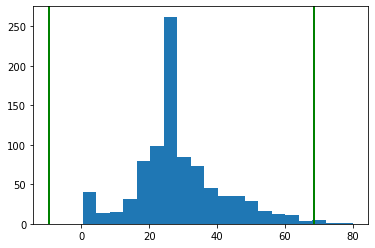

In [49]:
plt.hist(df['Age_fillna'], bins=20)
plt.axvline(low2, color='g', linewidth=2)
plt.axvline(up2, color='g', linewidth=2);

3. Сделаем фильтрацию и посчитаем те значения, которые являются выбросами

In [50]:
df[(df['Age_fillna']<low2) | (df['Age_fillna']>up2)].shape[0]

7

4. А теперь посмотрим на распределение данных без учета выбросов

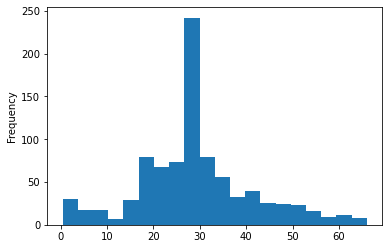

In [51]:
df[(df['Age_fillna']>=low2) & (df['Age_fillna']<=up2)]['Age_fillna'].plot(kind = "hist", bins=20);

### 1.5*IQR vs 3std

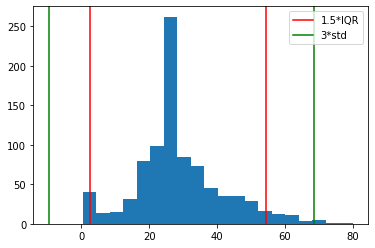

In [52]:
plt.hist(df["Age_fillna"], bins = 20) #строим гистограмму
plt.axvline(x=low1, color = 'r', label = '1.5*IQR') #помещаем на него линию нижней границы
plt.axvline(x=up1, color = 'r') #помещаем на него линию верхней границы
plt.axvline(x=low2, color = 'g', label = '3*std') #помещаем на него линию нижней границы
plt.axvline(x=up2, color = 'g') #помещаем на него линию верхней границы
plt.legend();

In [53]:
print(f"Среднее в изначальной выборке: {df['Age_fillna'].mean()}")
print(f"Среднее после 1.5*IQR: {df[(df['Age_fillna']>=low1) & (df['Age_fillna']<=up1)]['Age_fillna'].mean()}")
print(f"Среднее после 3*std: {df[(df['Age_fillna']>=low2) & (df['Age_fillna']<=up2)]['Age_fillna'].mean()}")

Среднее в изначальной выборке: 29.36158249158249
Среднее после 1.5*IQR: 28.515151515151516
Среднее после 3*std: 29.02111990950226


In [54]:
print(f"Медиана в изначальной выборке: {df['Age_fillna'].median()}")
print(f"Медиана после 1.5*IQR: {df[(df['Age_fillna']>=low1) & (df['Age_fillna']<=up1)]['Age_fillna'].median()}")
print(f"Медиана после 3*std: {df[(df['Age_fillna']>=low2) & (df['Age_fillna']<=up2)]['Age_fillna'].median()}")

Медиана в изначальной выборке: 28.0
Медиана после 1.5*IQR: 28.0
Медиана после 3*std: 28.0
